# 3.1.3 Mini-batch Gradient Descent

Mini-batch Gradient Descent is a compromise between Batch Gradient Descent and Stochastic Gradient Descent (SGD). It combines the efficiency of SGD with the stability of Batch Gradient Descent by updating the model parameters using small, randomly selected subsets of the training data called mini-batches. This approach helps in speeding up the training process while also reducing the noise associated with SGD.

Key steps in Mini-batch Gradient Descent:
1. **Initialize Parameters**: Start with initial guesses for the model parameters.
2. **Create Mini-batches**: Divide the training data into small mini-batches.
3. **Iterative Updates**: For each mini-batch, compute the gradient of the cost function with respect to the current parameters and update the parameters accordingly. Repeat this process for a number of epochs.
4. **Learning Rate**: The size of the steps taken to update the parameters, known as the learning rate, can be adjusted dynamically to improve convergence.

Mini-batch Gradient Descent is particularly useful for large datasets, providing a good balance between the high variance updates of SGD and the more deterministic updates of Batch Gradient Descent. It helps in achieving faster convergence and better generalization.

In the following example, we will demonstrate the implementation of Mini-batch Gradient Descent for a simple linear regression problem.


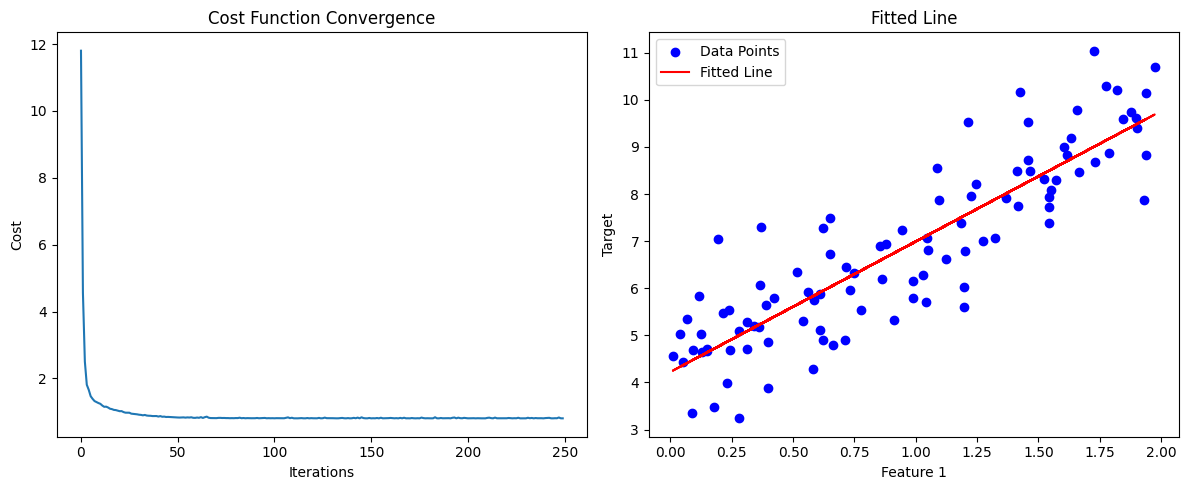

Parameters after 50 epochs: [4.22191654 2.7700278 ]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add x0 = 1 to each instance (intercept term)
X_b = np.c_[np.ones((100, 1)), X]

# Parameters initialization
theta = np.random.randn(2, 1)
m = len(X)
batch_size = 20

# Mini-batch Gradient Descent settings
learning_rate = 0.1
n_epochs = 50
n_batches = int(np.ceil(m / batch_size))

# Store cost history for visualization
costs = []

# Mini-batch Gradient Descent loop
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradients = 2/xi.shape[0] * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients
        cost = (1/m) * np.sum((X_b.dot(theta) - y) ** 2)
        costs.append(cost)

# Predict the fitted line
y_pred = X_b.dot(theta)

# Visualization
plt.figure(figsize=(12, 5))

# Plot the cost function convergence
plt.subplot(1, 2, 1)
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')

# Plot the fitted line
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Data Points', color='blue')
plt.plot(X, y_pred, label='Fitted Line', color='red')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Fitted Line')
plt.legend()

plt.tight_layout()
plt.show()

# Output the final parameters
print(f"Parameters after {n_epochs} epochs: {theta.ravel()}")


## Conclusion

Mini-batch Gradient Descent offers a balanced approach to optimizing machine learning models, especially when dealing with large datasets. By processing small subsets of the data at each iteration, it combines the computational efficiency of Stochastic Gradient Descent (SGD) with the stable convergence properties of Batch Gradient Descent.

In this section, we implemented Mini-batch Gradient Descent for a linear regression problem, demonstrating its ability to effectively minimize the cost function and fit a model to the data. The approach not only accelerates the training process but also provides more reliable updates compared to SGD, which can be overly noisy.

Mini-batch Gradient Descent is particularly advantageous in scenarios where the dataset is too large for Batch Gradient Descent but requires more stability than what SGD can offer. It strikes a good balance between speed and reliability, making it a versatile choice for many machine learning applications. By adjusting the batch size and learning rate, practitioners can fine-tune the algorithm to achieve optimal performance and convergence.
